In [146]:
import scipy.stats as sps
import math
import sys
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [147]:
size = 100
gamma = 0.95
A = 0
sigma = 1
def draw_interval(down, up, start, height):
    grid = np.linspace(1, size, size)
    plt.figure(figsize=(18, 5))
    plt.axis([0, 100, start, start + height])
    plt.fill_between(grid, down, up, color = 'orange')
    plt.show()

In [148]:
sample = sps.norm.rvs(loc=A, scale=sigma, size=size)

Построим доверительный интервал для $a$ при известном $\sigma^2$, который вычисляется по формуле:
$$\left( \overline{X} - z_{\frac{1 + \gamma}{2}}\frac{\sigma}{\sqrt{n}}, \overline{X} + z_{\frac{1 + \gamma}{2}}\frac{\sigma}{\sqrt{n}}\right)$$
Где $z$ - квантиль нормального распределения

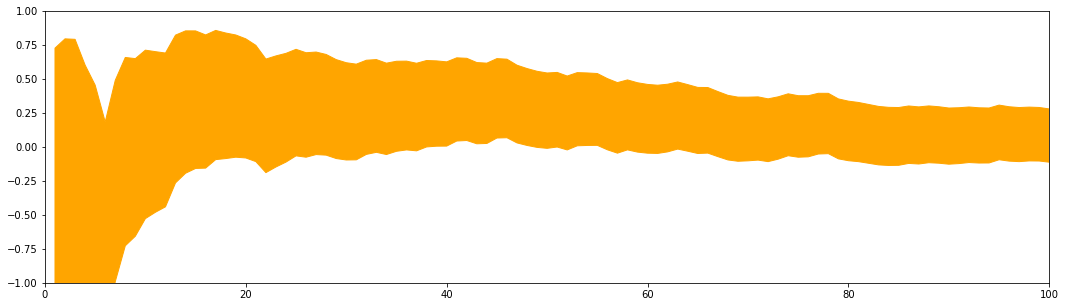

In [149]:
z = sps.norm.ppf((1 + gamma) / 2.)
up = []
down = []
for i in range(1, len(sample) + 1):
    down.append(np.mean(sample[0:i]) - z * ((sigma * 1. / i) ** 0.5))
    up.append(np.mean(sample[0:i]) + z * ((sigma * 1. / i) ** 0.5))
draw_interval(down, up, -1, 2) 

Построим доверительный интервал для $\sigma^2$ при известном $a$, который вычисляется по формуле:
$$\left(\frac{\sum\limits_{i = 1}^{n}{\left( X_i - a\right)^2}}{\chi^2_{\frac{1 + \gamma}{2}, n}}, \frac{\sum\limits_{i = 1}^{n}{\left( X_i - a\right)^2}}{\chi^2_{\frac{1 - \gamma}{2}, n}}\right)$$
Где $z$ - квантиль распределения $\chi^2(n)$

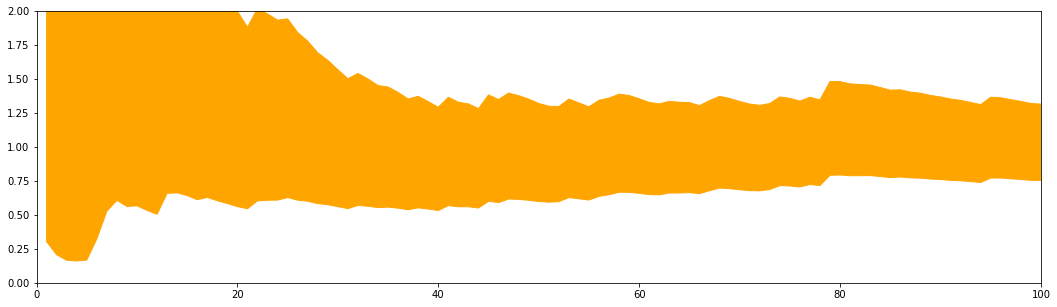

In [150]:
up = []
down = []
for i in range(1, len(sample) + 1):
    z1 = sps.chi2.ppf((1 + gamma) / 2, i)
    z2 = sps.chi2.ppf((1 - gamma) / 2, i)
    down.append(np.sum((np.array(sample[0:i]) - A) ** 2) / z1)
    up.append(np.sum((np.array(sample[0:i]) - A) ** 2) / z2)
draw_interval(down, up, 0, 2) 

Построим доверительный интервал для $a$ при неизвестном $\sigma^2$, который вычисляется по формуле:
$$\left( \overline{X} - t_{\frac{1+\gamma}{2}, n-1}\frac{S}{\sqrt{n}}, \overline{X} + t_{\frac{1+\gamma}{2}, n-1}\frac{S}{\sqrt{n}}\right)$$
Где $z$ - квантиль нормального распределения

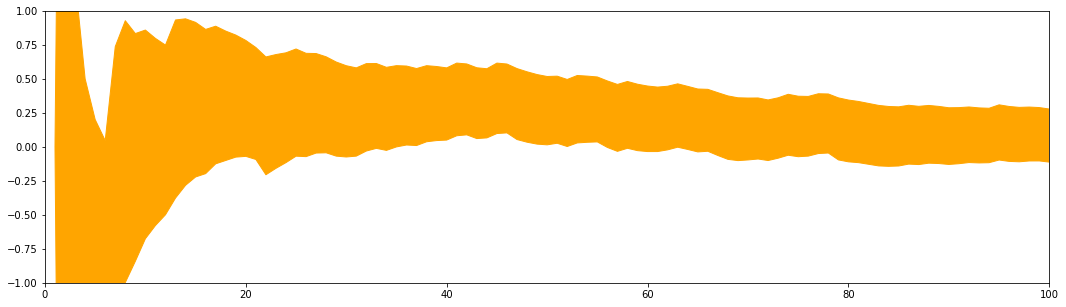

In [151]:
t = sps.t.ppf((1 + gamma) / 2, i - 1)
up = [0]
down = [0]
for i in range(2, len(sample) + 1):
    t = sps.t.ppf((1 + gamma) / 2, i - 1)
    down.append(np.mean(sample[0:i]) - (t * ((i / (i - 1)) * np.var(sample[0:i]) / i) ** 0.5))
    up.append(np.mean(sample[0:i]) + (t * ((i / (i - 1)) * np.var(sample[0:i]) / i) ** 0.5))
draw_interval(down, up, -1, 2) 

Построим доверительный интервал для $\sigma^2$ при неизвестном $a$, который вычисляется по формуле:
$$\left(\frac{\left(n - 1\right)S^2}{\chi^2_{\frac{1 + \gamma}{2}, n - 1}}, \frac{\left(n - 1\right)S^2}{\chi^2_{\frac{1 - \gamma}{2}, n - 1}}\right)$$
Где $z$ - квантиль распределения $\chi^2(n)$

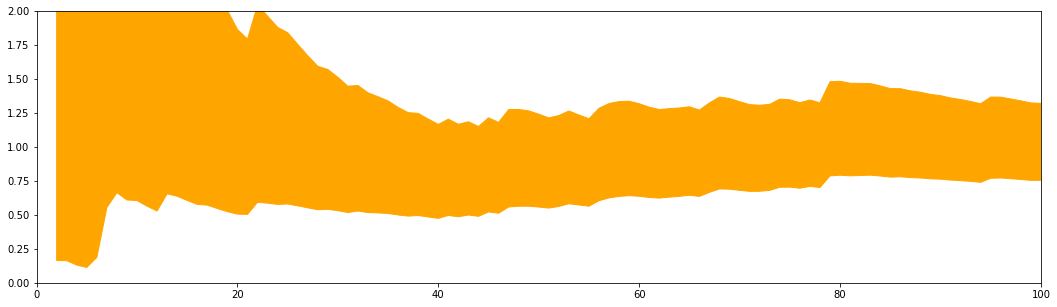

In [152]:
up = []
down = []
for i in range(1, len(sample) + 1):
    z1 = sps.chi2.ppf((1 + gamma) / 2, i - 1)
    z2 = sps.chi2.ppf((1 - gamma) / 2, i - 1)
    down.append(i * np.var(sample[0:i]) / z1)
    up.append(i * np.var(sample[0:i]) / z2)
draw_interval(down, up, 0, 2) 